# Lab: Titanic EDA

For this lab, we're going to take a look at the Titanic manifest. We'll be exploring this data to see what we can learn regarding the survival rates of different groups of people.

## Step 1: Reading the data

1. Go to [https://www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data)
2. If you scroll down the page a bit, you'll see a data dictionary explaining each of the columns. Take a minute to familiarize yourself with how the csv is structured.
4. Download the `train.csv` file into this project
3. Create an iPython notebook and load the csv into pandas.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

df = pd.read_csv('../data/titanic/train.csv')


## Step 2: Cleaning the data
Note: `NaN`, empty, and missing are synonymous.

#### 1. Create a bar chart showing how many missing values are in each column

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


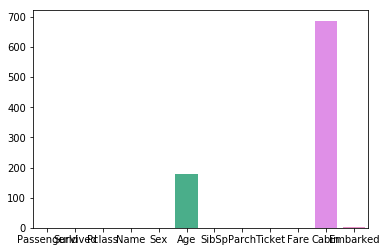

In [3]:
sns.barplot(y=df.isna().sum(), x=df.columns)

#### 2. Which column has the most `NaN` values? How many cells in that column are empty?

In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### 3. Delete all rows where `Embarked` is empty

In [5]:
titanic_clean = df.dropna(subset=['Embarked'])

#### 4. Fill all empty cabins with **¯\\_(ツ)_/¯**

Note: `NaN`, empty, and missing are synonymous.

In [6]:
titanic_clean = df.fillna(value={"Cabin":"'\\_(ツ)_/'"})
titanic_clean

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,'\_(ツ)_/',S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,'\_(ツ)_/',S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,'\_(ツ)_/',S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,'\_(ツ)_/',Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,'\_(ツ)_/',S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,'\_(ツ)_/',S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,'\_(ツ)_/',C


## Step 3: Feature extraction

time for some practice with pandas.

#### 1.  Create a new column called `FamilyCount` which will be the sum of those two columns.
 There are two columns that pertain to how many family members are on the boat for a given person.

In [7]:
titanic_clean['FamilyCount'] = titanic_clean['SibSp'] + titanic_clean['Parch']

In [8]:
titanic_clean

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,'\_(ツ)_/',S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,'\_(ツ)_/',S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,'\_(ツ)_/',S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,'\_(ツ)_/',Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,'\_(ツ)_/',S,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,'\_(ツ)_/',S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,'\_(ツ)_/',C,1


### in order to feed our training data into a classification algorithm, we need our categories to be converted into numbers!

#### 2. Try converting the `Sex` column into columns of 0's and 1's
The `Sex` column is made of two unique words (you might want to verify this using `.value_counts()` or `.unique()`).

In [22]:
titanic_clean_qual = pd.get_dummies(df, columns=['Sex'])


#### 3. Do you need two columns to solve #2?

#### 4. Reverends have a special title in their name.  Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.
you might want to use a `.map()` function here.

In [41]:
mask = titanic_clean_qual['Name'].str.contains('Rev.')
titanic_clean_qual[mask]


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",42.0,0,0,244310,13.000,NaN,S,0,1
150,151,0,2,"Bateman, Rev. Robert James",51.0,0,0,S.O.P. 1166,12.525,NaN,S,0,1
249,250,0,2,"Carter, Rev. Ernest Courtenay",54.0,1,0,244252,26.000,NaN,S,0,1
626,627,0,2,"Kirkland, Rev. Charles Leonard",57.0,0,0,219533,12.350,NaN,Q,0,1
848,849,0,2,"Harper, Rev. John",28.0,0,1,248727,33.000,NaN,S,0,1
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.000,NaN,S,0,1


In [43]:
titanic_clean_qual["IsReverend"]=mask
titanic_clean_qual

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1,False
5,6,0,3,"Moran, Mr. James",NaN,0,0,330877,8.4583,NaN,Q,0,1,False
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,S,0,1,False
7,8,0,3,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.0750,NaN,S,0,1,False
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,NaN,S,1,0,False
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,237736,30.0708,NaN,C,1,0,False


#### 5. Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`

These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column.  you can do this using `pd.get_dummies()` to generate your new columns and then using `.merge()`, `.join()`, or `pd.concat()` in order to attach them back to your dataframe!

#### BONUS
Extract _all_ titles from _everyone's_ names to create dummy columns.  you might want to try using `Series.str.split()`.

What are all the unique titles, and their counts?

## Step 4: Exploratory analysis

#### 1. What was the survival rate overall?

#### 2. Which gender fared the worst? What was their survival rate?

#### 3. What was the survival rate for each `Pclass`?

#### 4. Did any reverends survive? How many?

#### 5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**

#### 6. What is the survival rate for people whose `Age` is empty?

#### 7. What is the survival rate for each port of embarkation?

#### 8. What is the survival rate for children (under 12) in each `Pclass`?

#### 9. Who is the captain?  Did he survive?

#### 10. Of all the people that died, who had the most expensive ticket? How much did it cost?

#### 11. Does having family on the boat help or hurt your chances of survival?

## Step 5: Plotting
Using Matplotlib and Seaborn, create several charts showing the survival rates of different groups of people and describing some of the insights from above. It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.